# Первая часть. Исследование

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [69]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.6MB/s]


In [70]:
data = pd.read_csv('./train.csv')
data.shape

(5282, 20)

In [71]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [72]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Параметры None в наборе отсутствуют. Выведем случайные 5 строк данных

In [73]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3990,22,67.50,1544.05,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),1
4382,59,20.35,1267,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
3743,9,70.05,657.5,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
876,1,74.70,74.7,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
932,13,70.45,849.1,Male,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0


На первый взгляд с данными все ок

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

dtype('O')

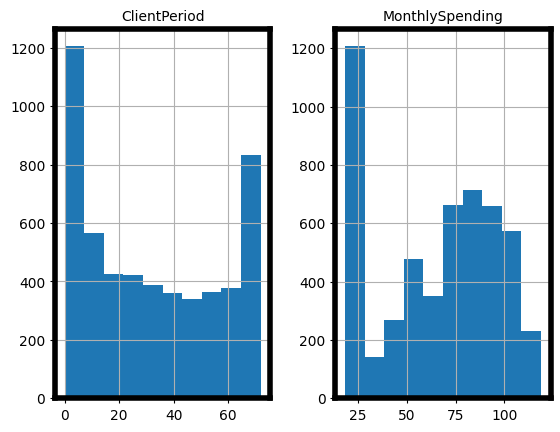

In [74]:
# Для начала построим гистрограммы числовых признаков средствами Pandas.
data.hist(num_cols)
#Видим что график TotalSpent не выводится. что-то не так с данными.
#Выведем тип данных столбца TotalSpent
data.TotalSpent.dtype
#получили тип данных dtype('O') вместо численного. Это тип (Python) objects, значит в столбце присутствуют данные разных типов

In [75]:
# отсортируем значения в поиске рудиментов
data['TotalSpent'].sort_values(ascending=True).values

array([' ', ' ', ' ', ..., '997.65', '998.1', '999.9'], dtype=object)

In [76]:
#Обнаружили символы ' '. Оценим их число
data[data['TotalSpent'] == ' '].shape[0]

9

<ipython-input-77-155b1c5fded8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpent'] = data['TotalSpent'].astype(float)


(5273, 20)

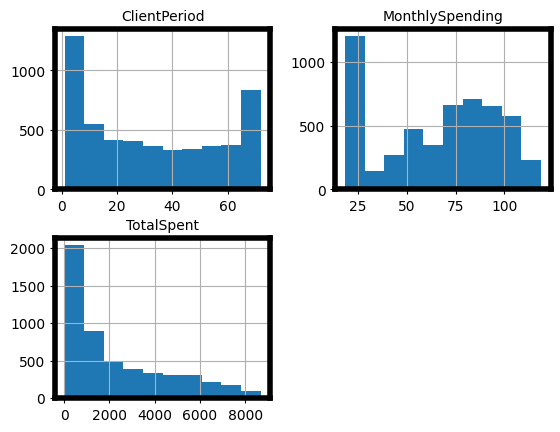

In [77]:
#Таких элементов 9 штук. По сравнению с количеством элементов в выборке их пренебрежимо мало. Исключим данные строки из выборки
data = data[data['TotalSpent'] != ' ']
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.hist(num_cols)
data.shape

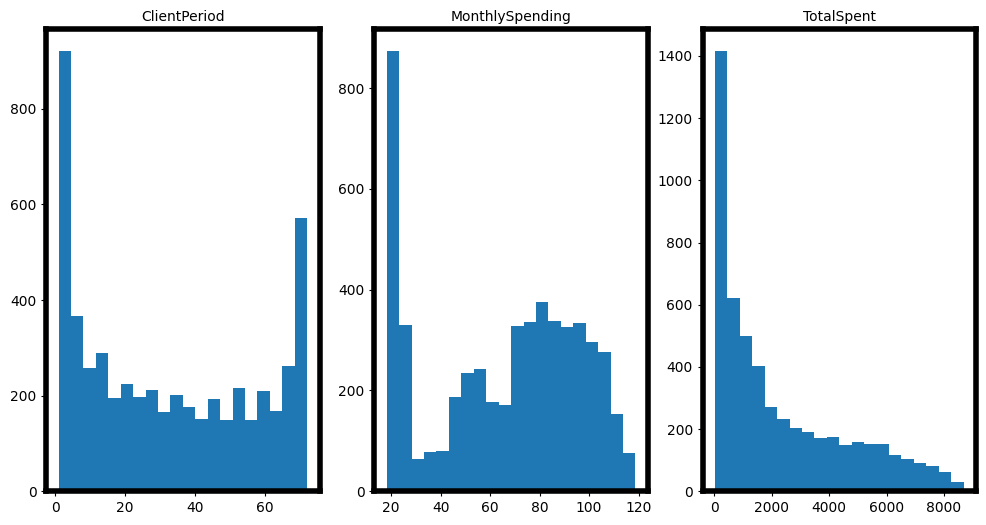

In [78]:
#Для численных призанков построим гистограмму (plt.hist(...)).

fig, axs = plt.subplots(nrows=1, ncols=len(num_cols), sharex=False, figsize=(12, 6))
for i in range(len(num_cols)):
  axs[i].hist(data[num_cols[i]], bins=20)
  axs[i].set_title(num_cols[i])
None

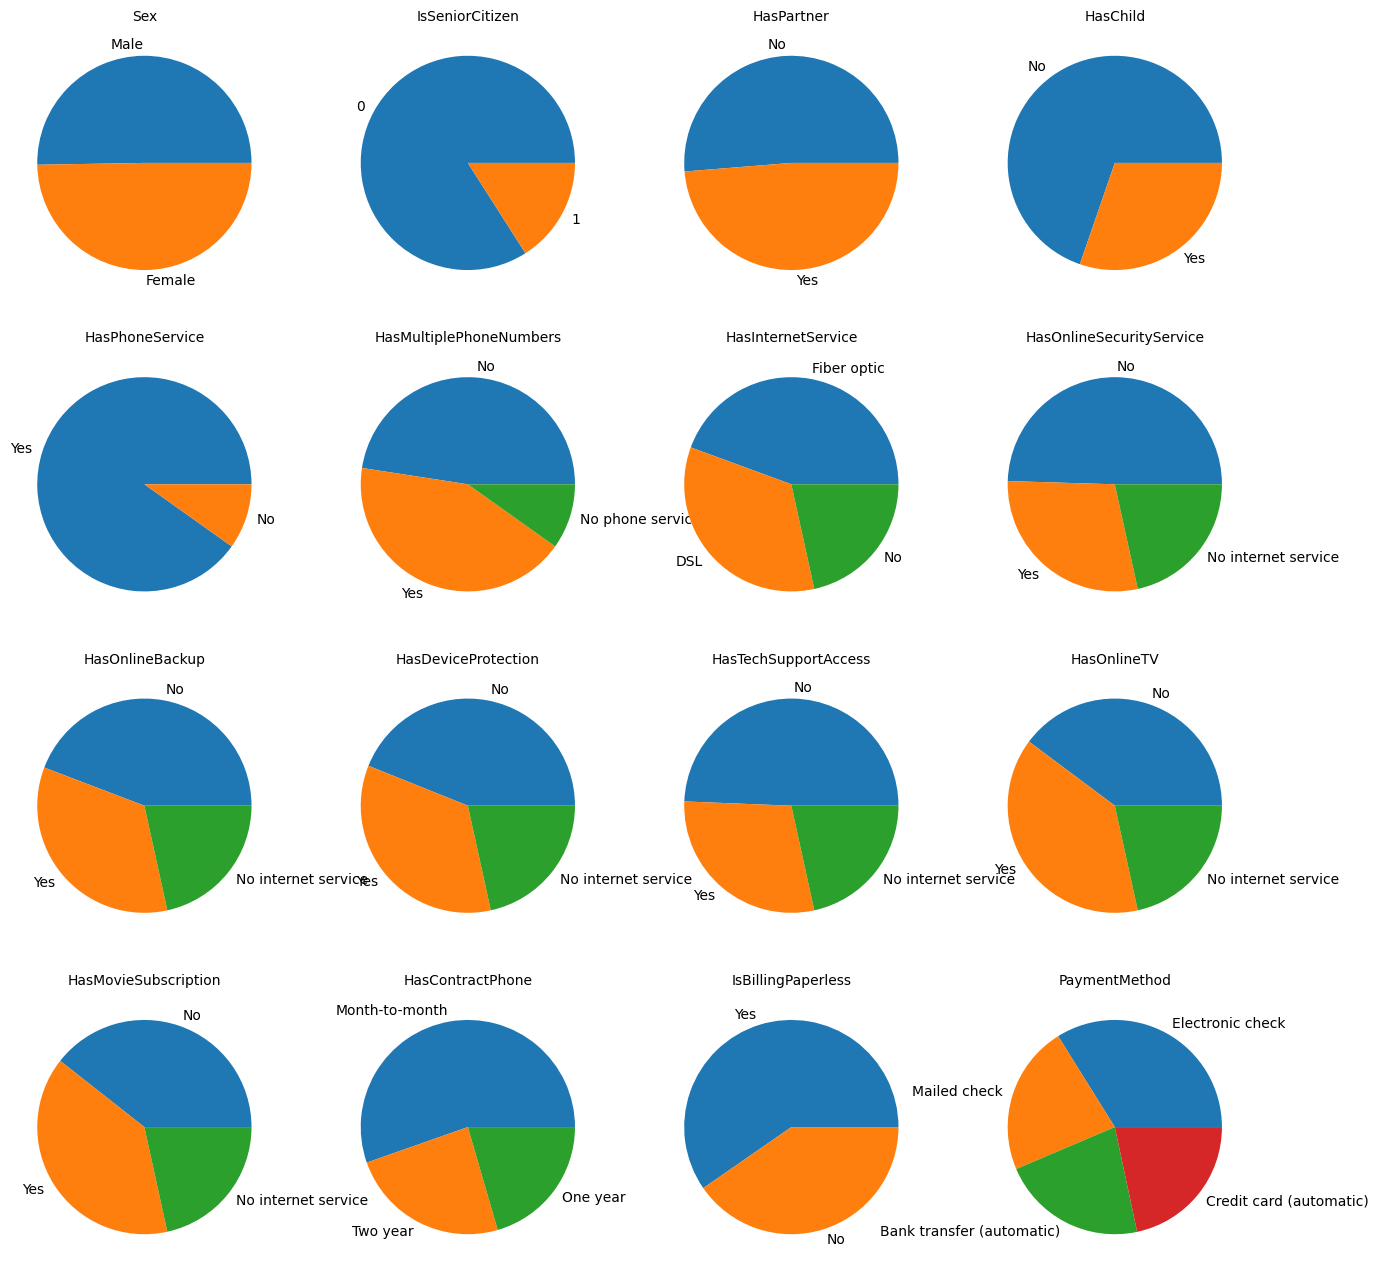

In [79]:
#Для категориальных посчитаем количество каждого значения для каждого признака.
#Для каждой колонки сделаем data.value_counts() и построим круговые диаграммы plt.pie(...)
#сделаем это на одном гарфике с помощью plt.subplots(...)).
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10, lw=4) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize=(16, 16))
ind = 0
for i in range(4):
  for j in range(4):
    values = data[cat_cols[ind]].value_counts()
    axs[i, j].pie(values, labels = values.index.tolist())
    axs[i, j].set_title(cat_cols[ind])
    ind+=1


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [80]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

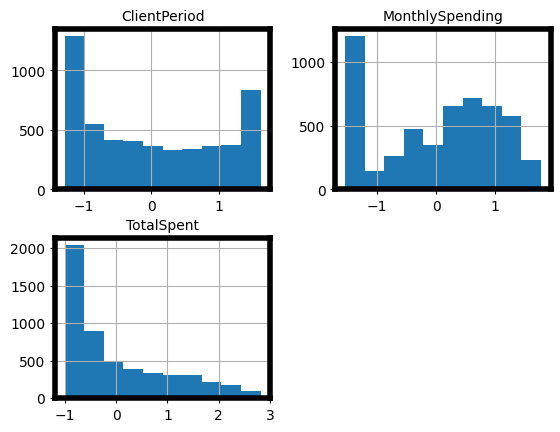

In [81]:
# Сохраним необработанные данные для бустинга
X_origin = data.iloc[:, :-1]

#Нормируем числовые признаки
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()
data.hist(num_cols)
None
#На гистограммах видим отнормированные числовые признаки

In [82]:
#Категориальные признаки кодируем при помощи энкодинга
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [83]:
#Видим как выросло количество столбцов данных
X_origin.shape, X.shape

((5273, 19), (5273, 45))

In [84]:
y = data[target_col]

#Разобьем выборку на train/valid
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=.25, random_state=42)
#Зададим массив гиперпараметров C в соответствии с заданием
cs = [100, 10, 1, 0.1, 0.01, 0.001]
#Создадим объект LogisticRegressionCV, в конструкторе передадим параметры в соответствии с заданием
clf = LogisticRegressionCV(Cs = cs, cv=5, scoring='roc_auc', refit=True, random_state=42)
#Запустим обучение с тюнингом по гиперпараметру
clf.fit(X_train, y_train)
None

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
#Сформируем предсказания на train/valid
y_train_predicted = clf.predict_proba(X_train)[:, 1]
y_test_predicted = clf.predict_proba(X_val)[:, 1]

from sklearn.metrics import roc_auc_score
best_score = roc_auc_score(y_val, y_test_predicted)
best_c = clf.C_[0]

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [86]:
best_score, best_c


(0.8383964324717874, 100.0)

**На тестовой выборке получили качество ROC_AUC=0.8383964324717874 при С = 100.0**

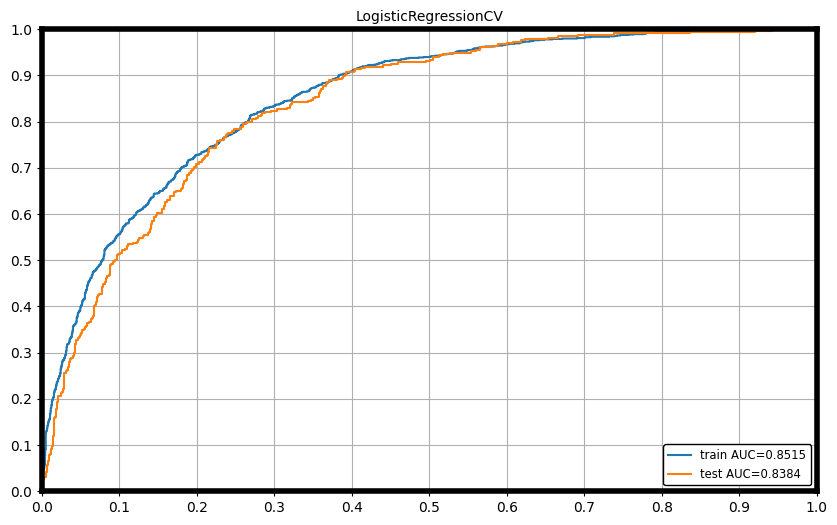

In [87]:
#Изобразим на графике реузльтаты предсказаний

from sklearn.metrics import roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_val, y_test_predicted)

plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='small', framealpha=1, loc='lower right').get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.linspace(0, 1, 11))
plt.title('LogisticRegressionCV')
plt.show()

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [88]:
#!pip install catboost
import catboost

1) Разделим выборку на train/valid. Протестируем catboost cо стандартными параметрами.

In [89]:

X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8,
                                                       random_state=42)
cat_cols_index = [X_origin.columns.get_loc(col) for col in cat_cols]

boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols_index,
                                             eval_metric='AUC:hints=skip_train~false')

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083332
0:	learn: 0.8244765	total: 16.9ms	remaining: 3.36s
1:	learn: 0.8289924	total: 31.3ms	remaining: 3.09s
2:	learn: 0.8296741	total: 42.4ms	remaining: 2.78s
3:	learn: 0.8363657	total: 56.6ms	remaining: 2.77s
4:	learn: 0.8369310	total: 71.4ms	remaining: 2.79s
5:	learn: 0.8401609	total: 89.4ms	remaining: 2.89s
6:	learn: 0.8429054	total: 108ms	remaining: 2.99s
7:	learn: 0.8445592	total: 123ms	remaining: 2.95s
8:	learn: 0.8476200	total: 138ms	remaining: 2.93s
9:	learn: 0.8498426	total: 152ms	remaining: 2.89s
10:	learn: 0.8510635	total: 167ms	remaining: 2.87s
11:	learn: 0.8518758	total: 182ms	remaining: 2.85s
12:	learn: 0.8516952	total: 199ms	remaining: 2.86s
13:	learn: 0.8528201	total: 213ms	remaining: 2.83s
14:	learn: 0.8537937	total: 229ms	remaining: 2.83s
15:	learn: 0.8556192	total: 248ms	remaining: 2.85s
16:	learn: 0.8558786	total: 264ms	remaining: 2.85s
17:	learn: 0.8564401	total: 278ms	remaining: 2.81s
18:	learn: 0.8580440	total: 306ms	remaining: 2.92s
19:	l

Оценим качество получившейся модели по критерию roc_auc, а также ее параметры количество деревьев и learning_rate

In [90]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

train_auc, test_auc

(0.8892021530104204, 0.8397499410238264)

In [91]:
boosting_model.tree_count_, boosting_model.learning_rate_

(200, 0.08333200216293335)

2) Протестируем разные зна
чения параметров количества деревьев и learning_rate'а и выберем лучшую по метрике ROC-AUC комбинацию.

In [92]:
#Сэкономим время проверяющему. В нижеприведенном коде я перебирал глубину, learning_rate и количество деревьев (iterations)

# CBC = catboost.CatBoostClassifier(
#                                   cat_features=cat_cols_index,
#                                   eval_metric='AUC:hints=skip_train~false')

# parameters = {'depth'         : [6,7,8,9,10],
#               'learning_rate' : [0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
#                'iterations'    : [10, 20,30,40,50,60,70,80,90,100]
#               }
# Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 5, n_jobs=-1)
# Grid_CBC.fit(X_train_origin, y_train)
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
# print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

**Получили следующий результат**

 The best estimator across ALL searched params:
 <catboost.core.CatBoostClassifier object at 0x7b9533273040>

 The best parameters across ALL searched params:
 {'depth': 7, 'iterations': 100, 'learning_rate': 0.06}

In [93]:
#Оценим метрику на получившихся параметрах
best_boosting_model = catboost.CatBoostClassifier(iterations = 100, depth=7,learning_rate=0.06 , silent=True,
                                             cat_features=cat_cols_index, eval_metric = 'AUC:hints=skip_train~false',
                                                  random_state=424242)
best_boosting_model.fit(X_train_origin, y_train)

y_train_predicted = best_boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = best_boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

train_auc, test_auc

(0.8664607490884525, 0.8440905874026894)

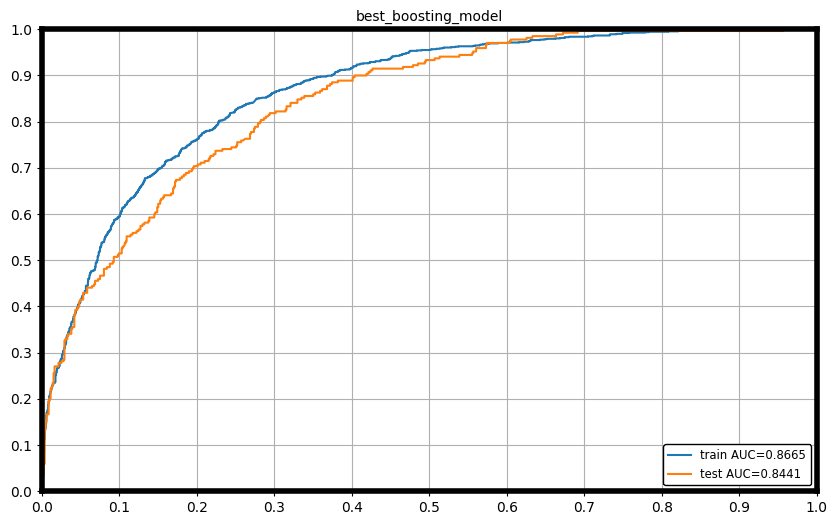

In [94]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='small', framealpha=1, loc='lower right').get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.linspace(0, 1, 11));
plt.title('best_boosting_model')
plt.show()

**Получили следующие результаты**

Лучшее значение для LogisticRegressionCV :  ROC_AUC=0.8383964324717874 при С = 10.0

Catboost со стандартными параметрами: ROC_AUC=0.8397499410238264 при tree_count_ = 200, learning_rate_ = 0.08333200216293335

Catboost после перебора:  ROC_AUC=0.8440905874026894 при   {'depth': 7, 'iterations': 100, 'learning_rate': 0.06}- данная модель дает лучшее предсказание.

# Предсказания

In [95]:
best_model = best_boosting_model

In [96]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
#Заменим пробелы на цифру 1, удалить эти строки нельзя - stepic выдает ошибку
X_test.replace(' ', 1, inplace=True)
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

In [97]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

In [41]:
submission

,Id,Churn
0,0,0.099624
1,1,0.493816
2,2,0.479276
3,3,0.045776
4,4,0.046297
...,...,...
1756,1756,0.141801
1757,1757,0.046297
1758,1758,0.477717
1759,1759,0.427121



**На Stepik получили 0.8483461526031737**